# **Trabajo Titulación - Análisis de Sentimientos en Redes Sociales**

Integrantes
* Natasha Villacís
* Kevin Velasco
* Antonio Trávez
* Bolívar Trujillo

### 1. Preprocesamiento

In [ ]:
# importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import random

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


url del sitio:
https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data


In [ ]:
# cargando el dataset
df = pd.read_csv("/content/text.csv")
df.head()
# dimensiones del dataframe
print(f"tamaño del df: {df.shape}")

tamaño del df: (416809, 3)


In [ ]:
# diccionario de etiquetas
label_dict = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

In [ ]:
# agregando columna "emotion"
df['emotion'] = df['label'].map(label_dict)

# eliminando unnamed
df = df.drop(columns=['Unnamed: 0'])
df.head()

,text,label,emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


1.1 Análisis exploratorio de datos

In [ ]:
# limpieza de datos

# verificando valores nulos
print(f"Valores nulos:\n{df.isnull().sum()}")

# verificando valores duplicados
print(f"valores duplicados: {df.duplicated().sum()}")

# eliminar valores nulos
df.dropna(inplace=True)

# remover duplicados
df.drop_duplicates(inplace=True)

# dimensiones del dataframe
print(f"tamaño del df: {df.shape}")

# información del dataframe
print(f"información del df depues de eliminar los duplicados: {df.info}")


Valores nulos:
text       0
label      0
emotion    0
dtype: int64
valores duplicados: 686
tamaño del df: (416123, 3)
información del df depues de eliminar los duplicados: <bound method DataFrame.info of                                                      text  label   emotion
0           i just feel really helpless and heavy hearted      4      fear
1       ive enjoyed being able to slouch about relax a...      0   sadness
2       i gave up my internship with the dmrg and am f...      4      fear
3                              i dont know i feel so lost      0   sadness
4       i am a kindergarten teacher and i am thoroughl...      4      fear
...                                                   ...    ...       ...
416804  i feel like telling these horny devils to find...      2      love
416805  i began to realize that when i was feeling agi...      3     anger
416806  i feel very curious be why previous early dawn...      5  surprise
416807  i feel that becuase of the tyranical n

Distribución de clases

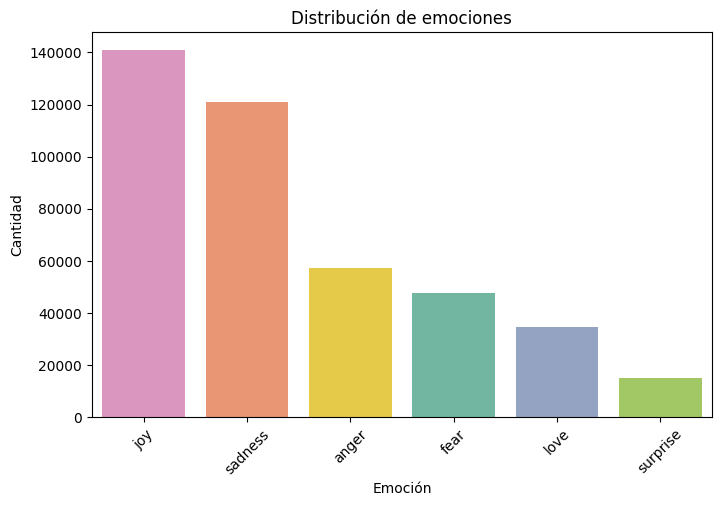

emotion
joy         140779
sadness     120989
anger        57235
fear         47664
love         34497
surprise     14959
Name: count, dtype: int64


In [ ]:
#distribución de las clases
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='emotion', hue='emotion',
              order=df['emotion'].value_counts().index,
              palette='Set2', legend=False)
plt.title("Distribución de emociones")
plt.xlabel("Emoción")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

# Contar registros por clase
conteo_emociones = df['emotion'].value_counts()
print(conteo_emociones)

Longitud de textos

In [ ]:
# Calcular longitud de texto en caracteres y palabras
df['numero_caracteres'] = df['text'].apply(len) # la función len devuelve la cantidad de caracteries en la cadena de texto
df['numero_palabras'] = df['text'].apply(lambda x: len(x.split()))
df.head()

,text,label,emotion,numero_caracteres,numero_palabras
0,i just feel really helpless and heavy hearted,4,fear,45,8
1,ive enjoyed being able to slouch about relax a...,0,sadness,234,45
2,i gave up my internship with the dmrg and am f...,4,fear,63,12
3,i dont know i feel so lost,0,sadness,26,7
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222,42


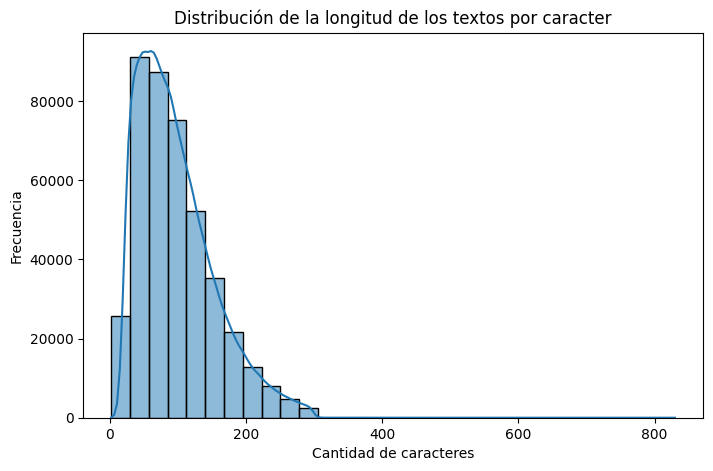

In [ ]:
#determinamos el número caracteres
#df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['numero_caracteres'], bins=30, kde=True)
plt.title("Distribución de la longitud de los textos por caracter")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Frecuencia")
plt.show()


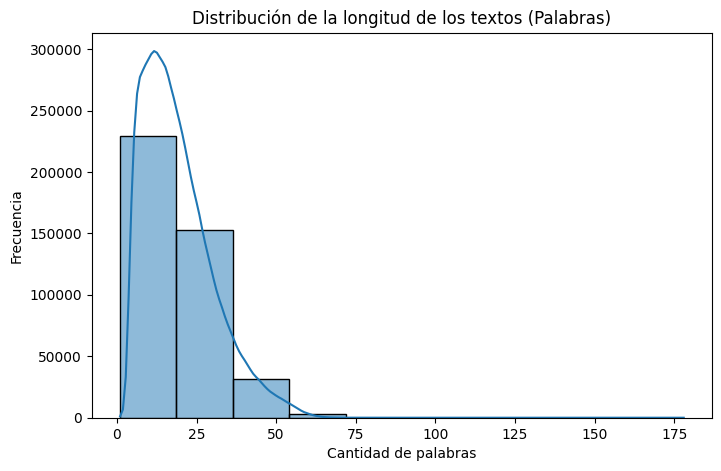

In [ ]:
#distribución por palabras
plt.figure(figsize=(8,5))
sns.histplot(df['numero_palabras'], bins=10, kde=True) # Ajustar bins según la nueva distribución
plt.title("Distribución de la longitud de los textos (Palabras)")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
df.head()

,text,label,emotion,numero_caracteres,numero_palabras
0,i just feel really helpless and heavy hearted,4,fear,45,8
1,ive enjoyed being able to slouch about relax a...,0,sadness,234,45
2,i gave up my internship with the dmrg and am f...,4,fear,63,12
3,i dont know i feel so lost,0,sadness,26,7
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222,42


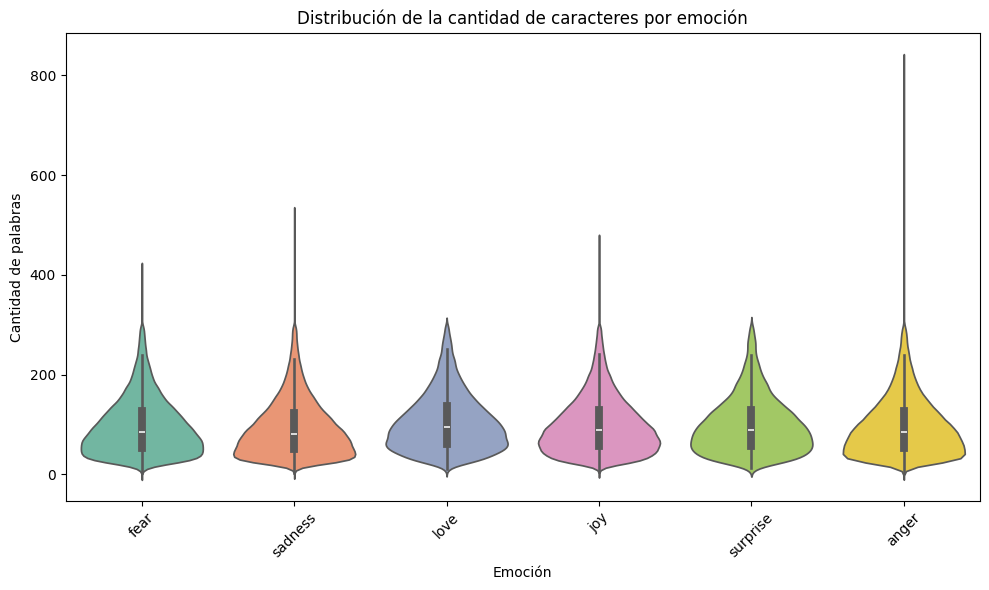

In [ ]:
#gráfico de violin por cantidad de caracteres
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='emotion', y='numero_caracteres', palette='Set2', hue='emotion', legend=False)
plt.title("Distribución de la cantidad de caracteres por emoción")
plt.xlabel("Emoción")
plt.ylabel("Cantidad de palabras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

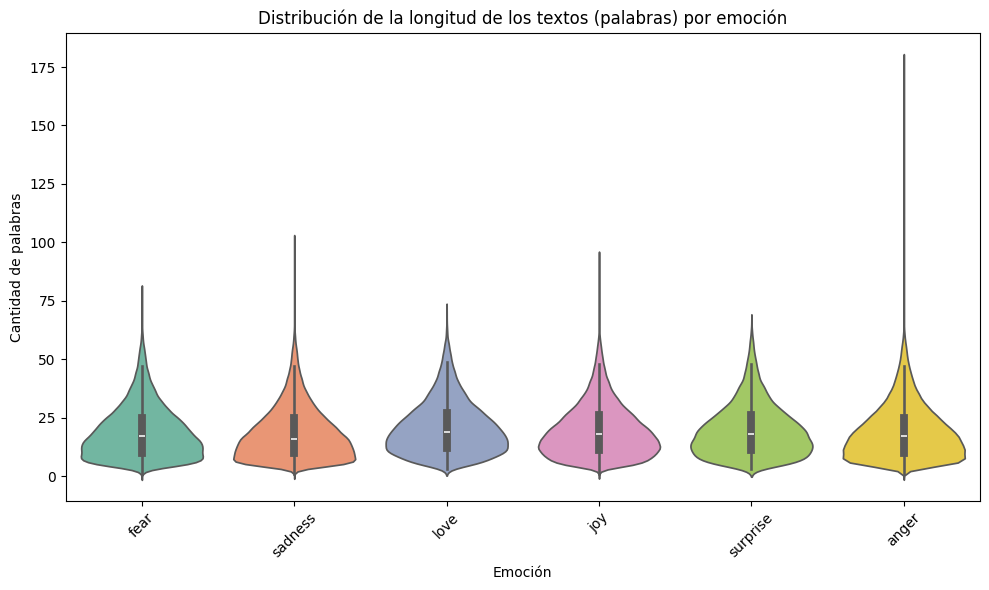

In [ ]:
#gráfico de violin por cantidad de palabras
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='emotion', y='numero_palabras', palette='Set2', hue='emotion', legend=False)
plt.title("Distribución de la longitud de los textos (palabras) por emoción")
plt.xlabel("Emoción")
plt.ylabel("Cantidad de palabras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La anchura muestra dónde están concentrados los textos (más anchos = más textos con esa longitud).

La línea blanca en el centro representa la mediana.

Puedes detectar si hay asimetría o distribución bimodal (dos picos de frecuencia).

Eliminando las stop words

In [ ]:
# eliminando artículos, preposiciones, pronombres
import nltk
import string
from nltk.corpus import stopwords # Import stopwords here
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def limpiar_texto(texto):
    tokens = texto.lower().split()
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(limpiar_texto)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,emotion,numero_caracteres,numero_palabras,clean_text
0,i just feel really helpless and heavy hearted,4,fear,45,8,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,sadness,234,45,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,4,fear,63,12,gave internship dmrg feeling distraught
3,i dont know i feel so lost,0,sadness,26,7,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222,42,kindergarten teacher thoroughly weary job take...


In [ ]:
# Calcular la nueva cantidad de palabras
df['numero_palabras_clean'] = df['clean_text'].apply(lambda x: len(x.split()))
df.head()

,text,label,emotion,numero_caracteres,numero_palabras,clean_text,numero_palabras_clean
0,i just feel really helpless and heavy hearted,4,fear,45,8,feel really helpless heavy hearted,5
1,ive enjoyed being able to slouch about relax a...,0,sadness,234,45,ive enjoyed able slouch relax unwind frankly n...,24
2,i gave up my internship with the dmrg and am f...,4,fear,63,12,gave internship dmrg feeling distraught,5
3,i dont know i feel so lost,0,sadness,26,7,dont know feel lost,4
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222,42,kindergarten teacher thoroughly weary job take...,17


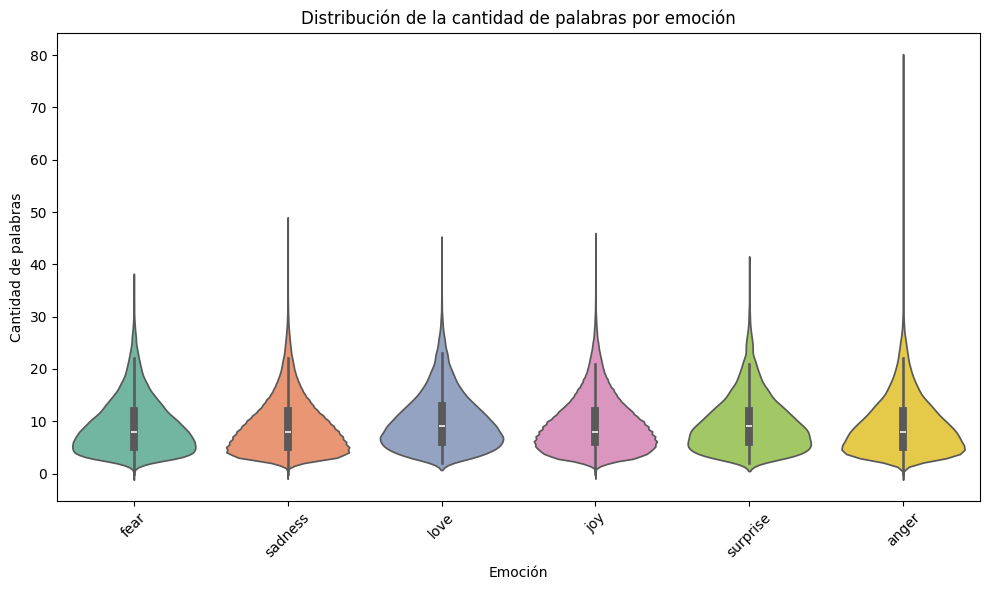

In [ ]:
#gráfico de violin por cantidad de palabras
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='emotion', y='numero_palabras_clean', palette='Set2', hue='emotion', legend=False)
plt.title("Distribución de la cantidad de palabras por emoción")
plt.xlabel("Emoción")
plt.ylabel("Cantidad de palabras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


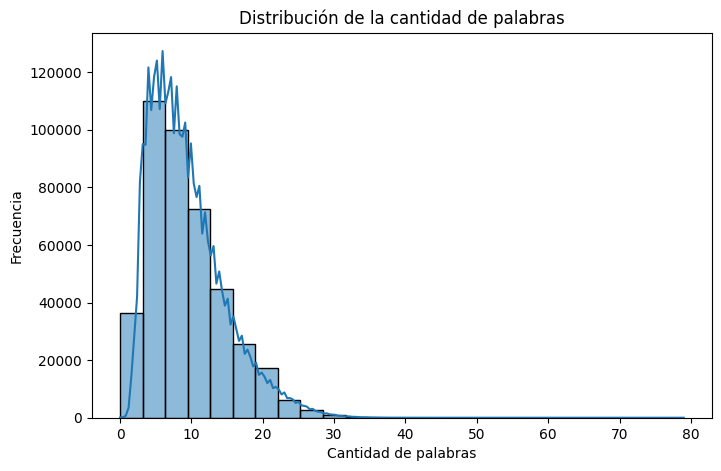

In [ ]:
#nueva distribución por palabras
plt.figure(figsize=(8,5))
sns.histplot(df['numero_palabras_clean'], bins=25, kde=True) # Ajustar bins según la nueva distribución
plt.title("Distribución de la cantidad de palabras")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")
plt.show()

La gran mayoría de los textos son cortos, y solo una pequeña proporción son muy largos, especialmente en la emoción "anger" donde hay registros que contienen una gran cantidad de palabras

In [ ]:
# rango intercuartilico
# Calcular el primer cuartil (Q1)
Q1 = df['numero_palabras_clean'].quantile(0.25)

# Calcular el tercer cuartil (Q3)
Q3 = df['numero_palabras_clean'].quantile(0.75)

# Calcular el Rango Intercuartílico (IQR)
IQR = Q3 - Q1

print(f"Primer Cuartil (Q1): {Q1}")
print(f"Tercer Cuartil (Q3): {Q3}")
print(f"Rango Intercuartílico (IQR): {IQR}")



Primer Cuartil (Q1): 5.0
Tercer Cuartil (Q3): 12.0
Rango Intercuartílico (IQR): 7.0


* El 25% de los textos en el conjunto de datos tienen una longitud de 5.0 palabras o menos
*  El 75% de los textos en el conjunto de datos tienen una longitud de 12.0 palabras o menos
* El rango en el que se encuentra el 50% de los datos es 7.0

La mayoría de loss textos son bastante cortos. El 50% de los textos más "típicos", los que están entre el 25% y el 75% de la distribución, tienen entre 5 y 12 palabras.


# 2. Modelos de ML

### 2.1 Prepración de los datos

In [ ]:
df.head()

,text,label,emotion,numero_caracteres,numero_palabras,clean_text,numero_palabras_clean
0,i just feel really helpless and heavy hearted,4,fear,45,8,feel really helpless heavy hearted,5
1,ive enjoyed being able to slouch about relax a...,0,sadness,234,45,ive enjoyed able slouch relax unwind frankly n...,24
2,i gave up my internship with the dmrg and am f...,4,fear,63,12,gave internship dmrg feeling distraught,5
3,i dont know i feel so lost,0,sadness,26,7,dont know feel lost,4
4,i am a kindergarten teacher and i am thoroughl...,4,fear,222,42,kindergarten teacher thoroughly weary job take...,17


In [ ]:
# Separar variables
X_raw = df['text']
X_clean = df['clean_text']
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split

# Paso 1: Train (60%) y Temp (40%)
X_raw_train, X_raw_temp, X_clean_train, X_clean_temp, y_train, y_temp = train_test_split(
    X_raw, X_clean, y, test_size=0.4, random_state=42, stratify=y)

# Paso 2: Val (20%) y Test (20%)
X_raw_val, X_raw_test, X_clean_val, X_clean_test, y_val, y_test = train_test_split(
    X_raw_temp, X_clean_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Ver tamaños
print(f"Tamaño total del dataset: {len(df)}")
print(f"Tamaño del conjunto de valores en X:")
print(f"Tamaño del conjunto de entrenamiento: {len(X_raw_train)}")
print(f"Tamaño del conjunto de validación: {len(X_raw_val)}")
print(f"Tamaño del conjunto de prueba: {len(X_raw_test)}")

print(f"Tamaño del conjunto de valores en Y:")
print(f"Tamaño del conjunto de entrenamiento: {len(y_train)}")
print(f"Tamaño del conjunto de validación: {len(y_val)}")
print(f"Tamaño del conjunto de prueba: {len(y_test)}")

Tamaño total del dataset: 416123
Tamaño del conjunto de valores en X:
Tamaño del conjunto de entrenamiento: 249673
Tamaño del conjunto de validación: 83225
Tamaño del conjunto de prueba: 83225
Tamaño del conjunto de valores en Y:
Tamaño del conjunto de entrenamiento: 249673
Tamaño del conjunto de validación: 83225
Tamaño del conjunto de prueba: 83225


In [ ]:
# TF-IDF (1000 palabras máx)
vectorizer_raw = TfidfVectorizer(max_features=1000)
X_raw_train_tfidf = vectorizer_raw.fit_transform(X_raw_train)
X_raw_val_tfidf = vectorizer_raw.transform(X_raw_val)
X_raw_test_tfidf = vectorizer_raw.transform(X_raw_test)

vectorizer_clean = TfidfVectorizer(max_features=1000)
X_clean_train_tfidf = vectorizer_clean.fit_transform(X_clean_train)
X_clean_val_tfidf = vectorizer_clean.transform(X_clean_val)
X_clean_test_tfidf = vectorizer_clean.transform(X_clean_test)

In [ ]:
# Palabras más comunes según TF-IDF
top_palabras_raw = pd.Series(vectorizer_raw.idf_, index=vectorizer_raw.get_feature_names_out()).sort_values().head(10)
top_palabras_clean = pd.Series(vectorizer_clean.idf_, index=vectorizer_clean.get_feature_names_out()).sort_values().head(10)

print("\n Palabras más comunes en texto original (TF-IDF):")
print(top_palabras_raw)

print("\n Palabras más comunes en texto limpio (TF-IDF):")
print(top_palabras_clean)


 Palabras más comunes en texto original (TF-IDF):
feel       1.417689
and        1.821140
to         1.924339
the        2.025147
feeling    2.158766
that       2.370960
of         2.377720
my         2.517214
in         2.707136
it         2.781630
dtype: float64

 Palabras más comunes en texto limpio (TF-IDF):
feel       1.417689
feeling    2.158766
like       2.815329
im         3.042986
really     3.854248
know       3.926844
time       4.034666
little     4.114112
get        4.119809
people     4.190637
dtype: float64


In [ ]:
# Entrenar y evaluar modelos
modelos_test = {
    "Naive Bayes (raw)": (MultinomialNB().fit(X_raw_train_tfidf, y_train), X_raw_test_tfidf),
    "Naive Bayes (clean)": (MultinomialNB().fit(X_clean_train_tfidf, y_train), X_clean_test_tfidf),
    "LogReg (raw)": (LogisticRegression(max_iter=1000).fit(X_raw_train_tfidf, y_train), X_raw_test_tfidf),
    "LogReg (clean)": (LogisticRegression(max_iter=1000).fit(X_clean_train_tfidf, y_train), X_clean_test_tfidf),
    "Random Forest (raw)": (RandomForestClassifier(n_estimators=10, random_state=42).fit(X_raw_train_tfidf, y_train), X_raw_test_tfidf),
    "Random Forest (clean)": (RandomForestClassifier(n_estimators=10, random_state=42).fit(X_clean_train_tfidf, y_train), X_clean_test_tfidf),
}

Naive Bayes (raw) - Accuracy (test): 0.8137
Naive Bayes (clean) - Accuracy (test): 0.8422
LogReg (raw) - Accuracy (test): 0.8542
LogReg (clean) - Accuracy (test): 0.8649
Random Forest (raw) - Accuracy (test): 0.8134
Random Forest (clean) - Accuracy (test): 0.8259


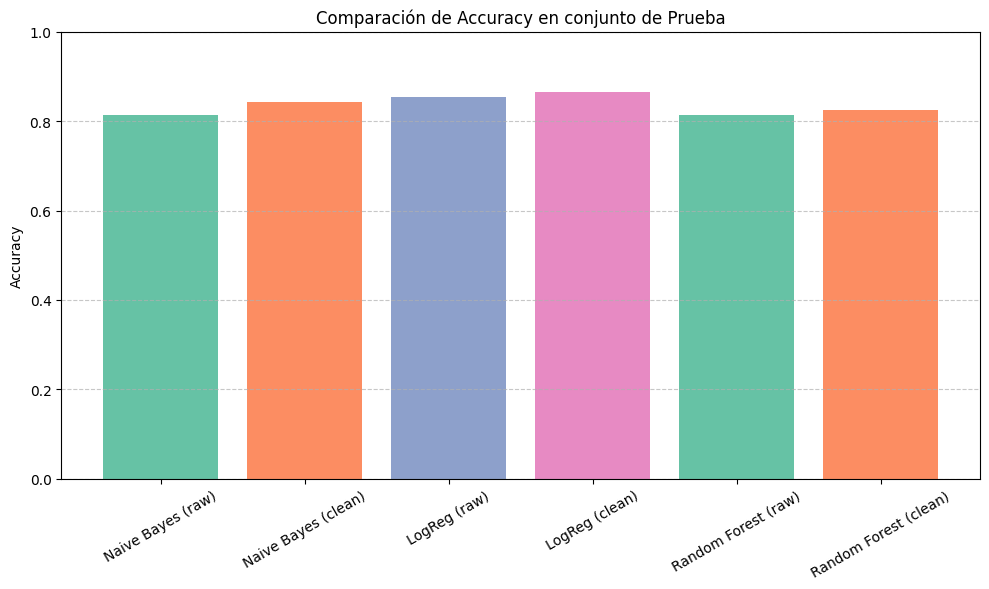

In [ ]:
# Crear diccionario con accuracy
accuracy_test = {}

for nombre, (modelo, X_test_tfidf) in modelos_test.items():
    y_pred = modelo.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    accuracy_test[nombre] = acc
    print(f"{nombre} - Accuracy (test): {round(acc, 4)}")

# Graficar comparación
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(accuracy_test.keys(), accuracy_test.values(), color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title("Comparación de Accuracy en conjunto de Prueba")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


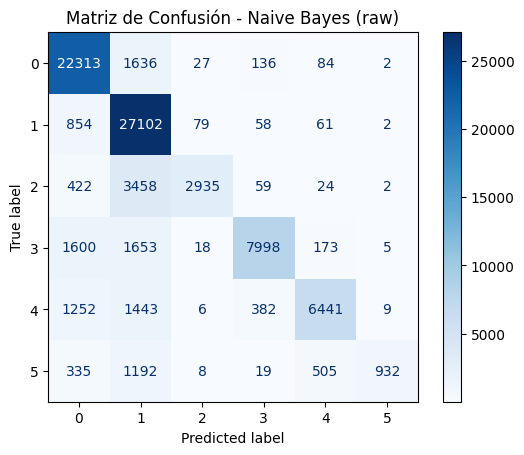

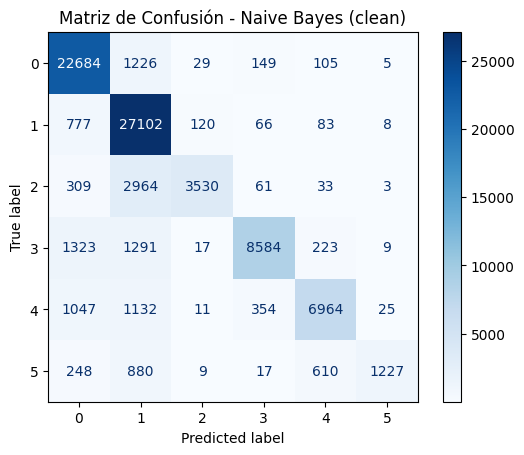

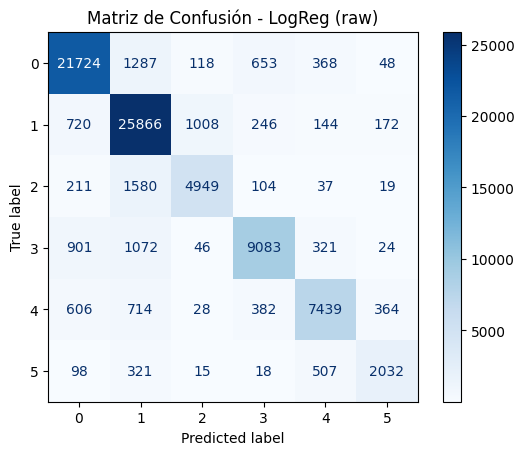

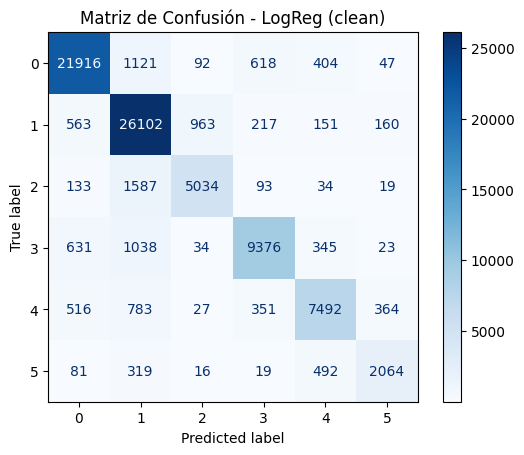

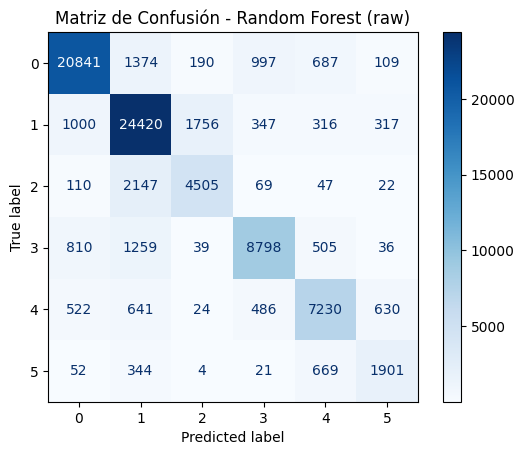

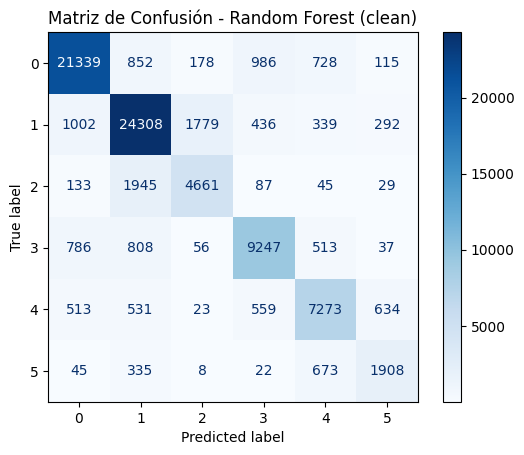


 Clasificación para: Naive Bayes (raw)
              precision    recall  f1-score   support

           0       0.83      0.92      0.88     24198
           1       0.74      0.96      0.84     28156
           2       0.96      0.43      0.59      6900
           3       0.92      0.70      0.80     11447
           4       0.88      0.68      0.77      9533
           5       0.98      0.31      0.47      2991

    accuracy                           0.81     83225
   macro avg       0.89      0.67      0.72     83225
weighted avg       0.84      0.81      0.80     83225


 Clasificación para: Naive Bayes (clean)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     24198
           1       0.78      0.96      0.86     28156
           2       0.95      0.51      0.67      6900
           3       0.93      0.75      0.83     11447
           4       0.87      0.73      0.79      9533
           5       0.96      0.41      0.57      2

In [ ]:
# Resultados
conf_matrices = {}
metricas = {}

for nombre, (modelo, X_test_tfidf) in modelos_test.items():
    y_pred = modelo.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[nombre] = cm
    metricas[nombre] = classification_report(y_test, y_pred, output_dict=False)

    # Mostrar matriz
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.grid(False)
    plt.show()

# Mostrar métricas por consola
for nombre, reporte in metricas.items():
    print(f"\n Clasificación para: {nombre}")
    print(reporte)

**Conclusión:**

Eliminar palabras como artículos, preposiciones o pronombres, presenta un mejor desempeño en las métricas de evaluación de los modelos
Estas palabras son comúnmente llamadas "stopwords": palabras de alta frecuencia y bajo valor semántico por sí solas.


#Modelo Final

## Librerias

In [ ]:
!pip -q install keras-nlp
!pip -q install gensim

import keras_hub
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from gensim.models import KeyedVectors
from IPython.display import clear_output


import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from tensorflow.keras.optimizers import Adam, RMSprop
import shap
import random

clear_output()


In [ ]:
#Hacemos una separacion de la variable dependiente tipo One-hot encoder
y_cat = to_categorical(df['label'])
y_cat

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
#Ponemos en un array a los reviews
texts = df['clean_text'].astype(str).values
texts

array(['feel really helpless heavy hearted',
       'ive enjoyed able slouch relax unwind frankly needed last weeks around end uni expo lately started find feeling bit listless never really good thing',
       'gave internship dmrg feeling distraught', ...,
       'feel curious previous early dawn time seek trouble',
       'feel becuase tyranical nature government el salvador savage social conditions general people set thought run shoe shop miguel marmols testimoney able work',
       'think spent time investigating surroundings things started feel curious people'],
      dtype=object)

##Division del data set: Entrenamiento, Validacion y Prueba

In [ ]:
#Dividir en entrenamiento y (validacion y prueba)
X_train, X_t, y_train, y_t = train_test_split(
    texts, y_cat, test_size=0.2, random_state=7)

In [ ]:
#Dividir en validacion y prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_t, y_t, test_size=0.5, random_state=7)

In [ ]:
#Reportamos el porcentaje de cada categoria de la variable dependiente, en cada base
def calcular_porcentaje(df, total_filas):
    # Contamos cuántas veces aparece cada categoría (columna)
    count = df.sum(axis=0)  # Suma las ocurrencias por columna
    porcentaje = (count / total_filas) * 100  # Calculamos el porcentaje
    return porcentaje

# Calculamos el porcentaje para cada base de datos
total_filas_df1 = len(y_train)
total_filas_df2 = len(y_val)
total_filas_df3 = len(y_test)

porcentaje_df1 = calcular_porcentaje(y_train, total_filas_df1)
porcentaje_df2 = calcular_porcentaje(y_val, total_filas_df2)
porcentaje_df3 = calcular_porcentaje(y_test, total_filas_df3)

# Mostramos los resultados
print("Porcentajes en entrenamiento:")
print(porcentaje_df1)

print("\nPorcentajes en validacion:")
print(porcentaje_df2)

print("\nPorcentajes en prueba:")
print(porcentaje_df3)


Porcentajes en entrenamiento:
[29.07827623 33.74817512  8.32327019 13.78860792 11.46086789  3.60080265]

Porcentajes en validacion:
[28.83062578 34.14399692  8.20436413 13.74843795 11.48466788  3.58790733]

Porcentajes en prueba:
[29.29613342 34.18162593  8.11044625 13.48617019 11.37144642  3.55417778]


Aqui se puede notar que las categorias mantienen una similar distribucion en las tres diferentes muestras (entrenamiento, validacion y prueba)

##Vectorizacion

In [ ]:
def vectorizacion(vocab_size, sequence_length):
  vectorizer = tf.keras.layers.TextVectorization(
      max_tokens=vocab_size,
      output_sequence_length=sequence_length
  )
  vectorizer.adapt(X_train)
  return vectorizer

##Descargar embeddings FasText

In [ ]:
# Descargar vectores embebidos en inglés
# Descargar los vectores FastText de inglés
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz

# Descomprimir los archivos
!gunzip cc.en.300.vec.gz # vectores de dim 300 en inglés

--2025-06-29 21:53:28--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.15, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz’

cc.en.300.vec.gz    100%[===================>]   1.23G   132MB/s    in 14s     

2025-06-29 21:53:42 (88.3 MB/s) - ‘cc.en.300.vec.gz’ saved [1325960915/1325960915]



In [ ]:
print(f"Número de palabras en la matriz de inglés:")
!head -n 1 cc.en.300.vec

Número de palabras en la matriz de inglés:
2000000 300


In [ ]:
# Cargar los embeddings preentrenados de FastText
def cargar_embeddings(limit):
  embedding_en = KeyedVectors.load_word2vec_format('cc.en.300.vec',
                                                   binary=False,
                                                   limit=limit)
  return embedding_en

## Adaptar la matriz de pesos con los vectores de FastText

In [ ]:
def actualizacion_pesos(vectorizer, embedding_en):
  # Obtener el vocabulario del encoder
  vocab = vectorizer.get_vocabulary()
  # Dimensiones de los embeddings preentrenados
  embedding_dim = 300  # Dimensión de los embeddings de FastText

  # 1. Crear la matriz de embeddings. Inicializar con ceros
  # ya que esto maneja el token de padding (índice 0) correctamente por defecto.
  embedding_matrix = np.zeros((len(vocab), embedding_dim))

  # 2. Llenar la matriz con los vectores de FastText y manejar tokens especiales
  # solo vamos a usar los de inglés
  for i, word in enumerate(vocab):
      if word in embedding_en:
          # La palabra está en FastText, usa su vector
          embedding_matrix[i] = embedding_en[word]
      else:
          # Otras palabras en nuestro vocabulario pero no en FastText
          embedding_matrix[i] = np.random.uniform(-0.25, 0.25, embedding_dim)

  return embedding_matrix

## Modelo de Red Neuronal

In [ ]:
# MODELO
def red_model(pretrained_vector_matrix,vectorizer,sequence_length, n_lstm, n_dense, n_l1, n_l2,n_drop):
    # Entrada en texto
    input_text = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name="text_input")

    # Vectorización
    x = vectorizer(input_text)

    # Embedding
    embedding = tf.keras.layers.Embedding(
        input_dim=len(vectorizer.get_vocabulary()),
        output_dim=pretrained_vector_matrix.shape[1],
        embeddings_initializer=tf.keras.initializers.Constant(pretrained_vector_matrix),
        trainable=True,
        mask_zero=True
    )(x)

    # RNN
    x = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(n_lstm, return_sequences=False)
    )(embedding)

    x = tf.keras.layers.Dense(
      n_dense,
      activation='relu',
      kernel_regularizer=tf.keras.regularizers.l1_l2(l1=n_l1, l2=n_l2) #Regularizacion
    )(x)

    x = tf.keras.layers.Dropout(n_drop)(x)

    output = tf.keras.layers.Dense(len(df['label'].unique()), activation='softmax')(x)

    # Modelo final (con texto como input)
    full_model = tf.keras.Model(inputs=input_text, outputs=output)

    # Modelo SHAP (recibe texto ya vectorizado)
    input_int = tf.keras.layers.Input(shape=(sequence_length,), dtype=tf.int64, name="int_input")
    embedded_input = full_model.layers[2](input_int)  # Capa de embedding
    for layer in full_model.layers[3:]:
        embedded_input = layer(embedded_input)
    shap_model = tf.keras.Model(inputs=input_int, outputs=embedded_input)

    return full_model, shap_model

##Construccion de la Red

In [ ]:
# Construccion de modelo
def build_model(pretrained_vector_matrix,vectorizer,sequence_length,optimizer,n_lstm, n_dense, n_l1, n_l2,n_drop):
  K.clear_session()
  model, shap_model = red_model(pretrained_vector_matrix,vectorizer,sequence_length,n_lstm, n_dense, n_l1, n_l2,n_drop)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model, shap_model

## Datasets optimizados


In [ ]:
SEED=7
batch_size=1024

#Para el entrenamiento
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=len(X_train), seed=SEED, reshuffle_each_iteration=False)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.shuffle(buffer_size=len(X_val), seed=SEED, reshuffle_each_iteration=False)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

I0000 00:00:1751324893.284613    4273 gpu_process_state.cc:208] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1751324893.285981    4273 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13622 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


## Early stopping

In [ ]:
# Entrenar con early stopping para evitar sobre entrenamiento
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Métrica a monitorear
    patience=3,          # Número de épocas sin mejora después de las cuales se detendrá el entrenamiento
    verbose=1,           # Imprime un mensaje cuando el entrenamiento se detiene
    restore_best_weights=True # Restaura los pesos del modelo de la época con el mejor valor de la métrica monitoreada
)

##Optimizadores

In [ ]:
def get_optimizer(name, lr):
    if name == 'adam':
        return Adam(learning_rate=lr)
    elif name == 'rmsprop':
        return RMSprop(learning_rate=lr)

## Entrenamiento

In [ ]:
# Entrenar modelo
def entrenamiento(vocab_size, sequence_length,limit, optimizer, epochs,n_lstm, n_dense, n_l1, n_l2,n_drop,lr):
  vectorizer = vectorizacion(vocab_size, sequence_length)
  embedding_en = cargar_embeddings(limit)
  pretrained_vector_matrix = actualizacion_pesos(vectorizer, embedding_en)
  optim=get_optimizer(optimizer,lr)
  model, shap_model = build_model(pretrained_vector_matrix,vectorizer,sequence_length,optim,n_lstm, n_dense, n_l1, n_l2,n_drop)
  history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[early_stopping_callback],verbose=0)
  return history, shap_model, model, vectorizer

##Hiperparametros

In [ ]:
vocab_size=[10000, 25000]
sequence_length=[20, 50, 100]
limit=[50000, 100000]
optimizer=['adam', 'rmsprop']
n_lstm=[32, 64, 128]
n_dense=[32, 64, 128]
n_l=[0.0, 0.01, 0.001]
n_lr=[0.01, 0.001]
n_drop=[0.3, 0.6]

In [ ]:
guar_perdi=[]

epocas=6
conteo=0
loss=999999
for a in vocab_size:
  for b in sequence_length:
    for c in limit:
      for d in optimizer:
        for e in n_lstm:
          for f in n_dense:
            for g in n_l:
              for h in n_lr:
                for i in n_drop:
                  conteo+=1
                  print(conteo)
                  history, shap_model,model,vectorizer=entrenamiento(vocab_size=a,sequence_length=b,limit=c,optimizer=d,epochs=epocas,n_lstm=e,n_dense=f,n_l1=g,n_l2=g,n_drop=i,lr=h)
                  best_epoch = np.argmin(history.history['val_loss'])
                  best_val_loss = history.history['val_loss'][best_epoch]
                  guar_perdi.append(best_val_loss)
                  if loss>best_val_loss:
                    mejor_vocab_size=a
                    mejor_sequence_length=b
                    mejor_limit=c
                    mejor_optimizer=d
                    mejor_n_lstm=e
                    mejor_n_dense=f
                    mejor_n_l=g
                    mejor_n_lr=h
                    mejor_n_drop=i
                    loss=best_val_loss
                    print(f"""Mejores parametros:
                      Vocab size: {mejor_vocab_size},
                      Sequence length: {mejor_sequence_length},
                      Limit: {mejor_limit},
                      Optimizer: {mejor_optimizer},
                      N LSTM: {mejor_n_lstm}
                      N Dense: {mejor_n_dense}
                      N L: {mejor_n_l}
                      N LR: {mejor_n_lr}
                      N Drop: {mejor_n_drop}
                      loss: {loss}""")

1


I0000 00:00:1751194726.506767  766251 cuda_dnn.cc:529] Loaded cuDNN version 90300


Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
Mejores parametros:
                      Vocab size: 10000,
                      Sequence length: 20,
                      Limit: 50000,
                      Optimizer: adam,
                      N LSTM: 32
                      N Dense: 32
                      N L: 0.0
                      N LR: 0.01
                      N Drop: 0.3
                      loss: 0.1052287369966507
2
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
3
Restoring model weights from the end of the best epoch: 4.
4
Restoring model weights from the end of the best epoch: 4.
5
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
6
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
7
Restoring model weights from the end of the best epoch: 6.
8
Restoring model weights from the end of the best epoch: 6.
9
Restoring model weights f

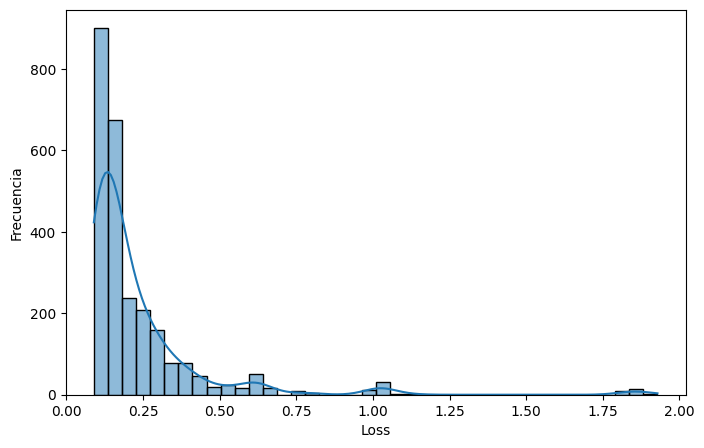

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(guar_perdi, bins=40, kde=True)
#plt.title("Distribución de la función de perdida en las combinaciones")
plt.xlabel("Loss")
plt.ylabel("Frecuencia")
plt.savefig("distribucion_loss.png", dpi=300)
plt.show()

##Entrenamiento con los mejores hiperparametros

In [ ]:
history,shap_model,model,vectorizer=entrenamiento(
    vocab_size=25000,
    sequence_length=50,
    limit=100000,
    optimizer="rmsprop",
    epochs=10,
    n_lstm=64,
    n_dense=64,
    n_l1=0.0,
    n_l2=0.0,
    n_drop=0.3,
    lr=0.01
)

Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


##Testeo

###Evaluacion

In [ ]:
score_1 = model.evaluate(X_test, y_test)
score_1

1301/1301 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9410 - loss: 0.0958


[0.09494040906429291, 0.9411001205444336]

###Prediccion

In [ ]:
# Predicción en el conjunto de prueba
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)
y_test2=y_test.argmax(axis=1)

1301/1301 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


###Reporte de clasificacion

In [ ]:
print(classification_report(y_test2, y_pred,target_names=['Sadness','Joy','Love','Anger', 'Fear','Surprise']))

              precision    recall  f1-score   support

     Sadness       0.98      0.97      0.98     12191
         Joy       0.92      1.00      0.96     14224
        Love       0.99      0.70      0.82      3375
       Anger       0.94      0.96      0.95      5612
        Fear       0.88      0.94      0.91      4732
    Surprise       0.98      0.64      0.77      1479

    accuracy                           0.94     41613
   macro avg       0.95      0.87      0.90     41613
weighted avg       0.94      0.94      0.94     41613



###Matriz de confusion

Matriz de confusión:



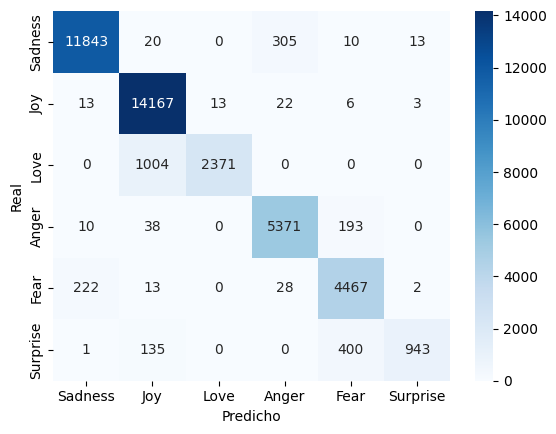

In [ ]:
cm = confusion_matrix(y_test2, y_pred)
print("Matriz de confusión:\n")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sadness','Joy','Love','Anger', 'Fear','Surprise'], yticklabels=['Sadness','Joy','Love','Anger', 'Fear','Surprise'])
#plt.title('Matriz de confusión');
plt.xlabel('Predicho'); plt.ylabel('Real')
plt.savefig("matriz_confusion.png", dpi=300)
plt.show()

###Shap

In [ ]:
import shap
# Vectorizar texto
X_train_vec = vectorizer(X_train).numpy()

# Explicador SHAP (automático)
explainer = shap.Explainer(shap_model, X_train_vec[:100])


####Data set

In [ ]:
nm_mu=80
longitud=12

# Semilla para obtener los mismos resultados siempre
random.seed(17)

#Aqui se genera un data set con el mismo numero de observaciones para cada etiqueta
# Crear un diccionario para agrupar las reviews por etiqueta
agrupadas = {}

# Filtrar las listas para quedarnos solo con las entradas cuyo texto tenga una longitud dada
filtered_X_test = [text for text in X_test if len(text.split()) ==longitud]
filtered_Y_test = [y_test2[i] for i in range(len(X_test)) if len(X_test[i].split()) == longitud]

# Agrupar las reviews según sus etiquetas
for review, etiqueta in zip(filtered_X_test, filtered_Y_test):
    if str(etiqueta) not in agrupadas:
        agrupadas[str(etiqueta)] = []
    agrupadas[str(etiqueta)].append(review)

# Ahora seleccionamos 5 muestras aleatorias de cada etiqueta
X_seleccionado = []
Y_seleccionado = []

for etiqueta, reviews in agrupadas.items():
    # Verificamos que haya al menos 5 muestras para seleccionar
    if len(reviews) >= nm_mu:
        seleccionadas = random.sample(reviews, nm_mu)
        X_seleccionado.extend(seleccionadas)
        Y_seleccionado.extend([etiqueta] * nm_mu)

# Imprimir los resultados
print("Reviews seleccionadas:")
print(X_seleccionado)
print("Etiquetas seleccionadas:")
print(Y_seleccionado)


Reviews seleccionadas:
['happy friday come terms fact accomplished much career week feeling grumpy grouchy', 'feel ive got fucked disease part seas fingers come pointing make laugh', 'im excited nervous feeling bit rushed get last minute details order trip', 'also think message kruger saying feels people greedy money thinking since always', 'realized couple people relatives feel need put place constantly saying something rude', 'amazed blood pressure control fact best ever certainly due fact feeling stressed', 'havent feeling irritable past week since new routine given energy scientific perspective', 'feel greedy times think wonderful gift received christ fail pray others receive', 'feeling inpatient annoyed choose would rather wife feel treasured feel brunt frustration', 'move turn alarm clock buzzer feel irritated think dont want get yet', 'opposite didnt feel things anything particularly rather hated winning meant brother etc', 'im gonna enjoy life freely without feeling jealous afr

In [ ]:
# Obtener valores SHAP para algunas muestras
X_test_vec = vectorizer(X_seleccionado).numpy()
shap_values = explainer(X_test_vec)

PermutationExplainer explainer: 481it [41:02,  5.13s/it]                        


In [ ]:
#predecimos
# Convertir la lista a un numpy array de strings
X_seleccionado_array = np.array(X_seleccionado, dtype=object)
y_pred_proba_2 = model.predict(X_seleccionado_array)
y_pred_2 = y_pred_proba_2.argmax(axis=1)
# Convertimos las predicciones numéricas a strings
predicted_class_str = y_pred_2.astype(str)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Obtener los valores numéricos del objeto Explanation
shap_array = shap_values.values

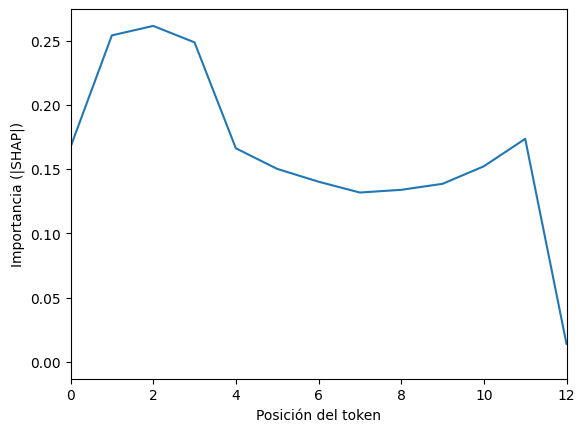

In [ ]:
# 1. Sumar la importancia absoluta por clase (quedará shape (5, 100))
token_importance = np.abs(shap_array).sum(axis=2)

# 2. Promediar sobre las 5 muestras
avg_token_importance = np.mean(token_importance, axis=0)

# 3. Visualizar
plt.plot(avg_token_importance)
#plt.title("Importancia promedio por posición del token")
plt.xlabel("Posición del token")
plt.ylabel("Importancia (|SHAP|)")
plt.xlim(0,longitud)
plt.savefig("importancia_promedio.png", dpi=300)
plt.show()

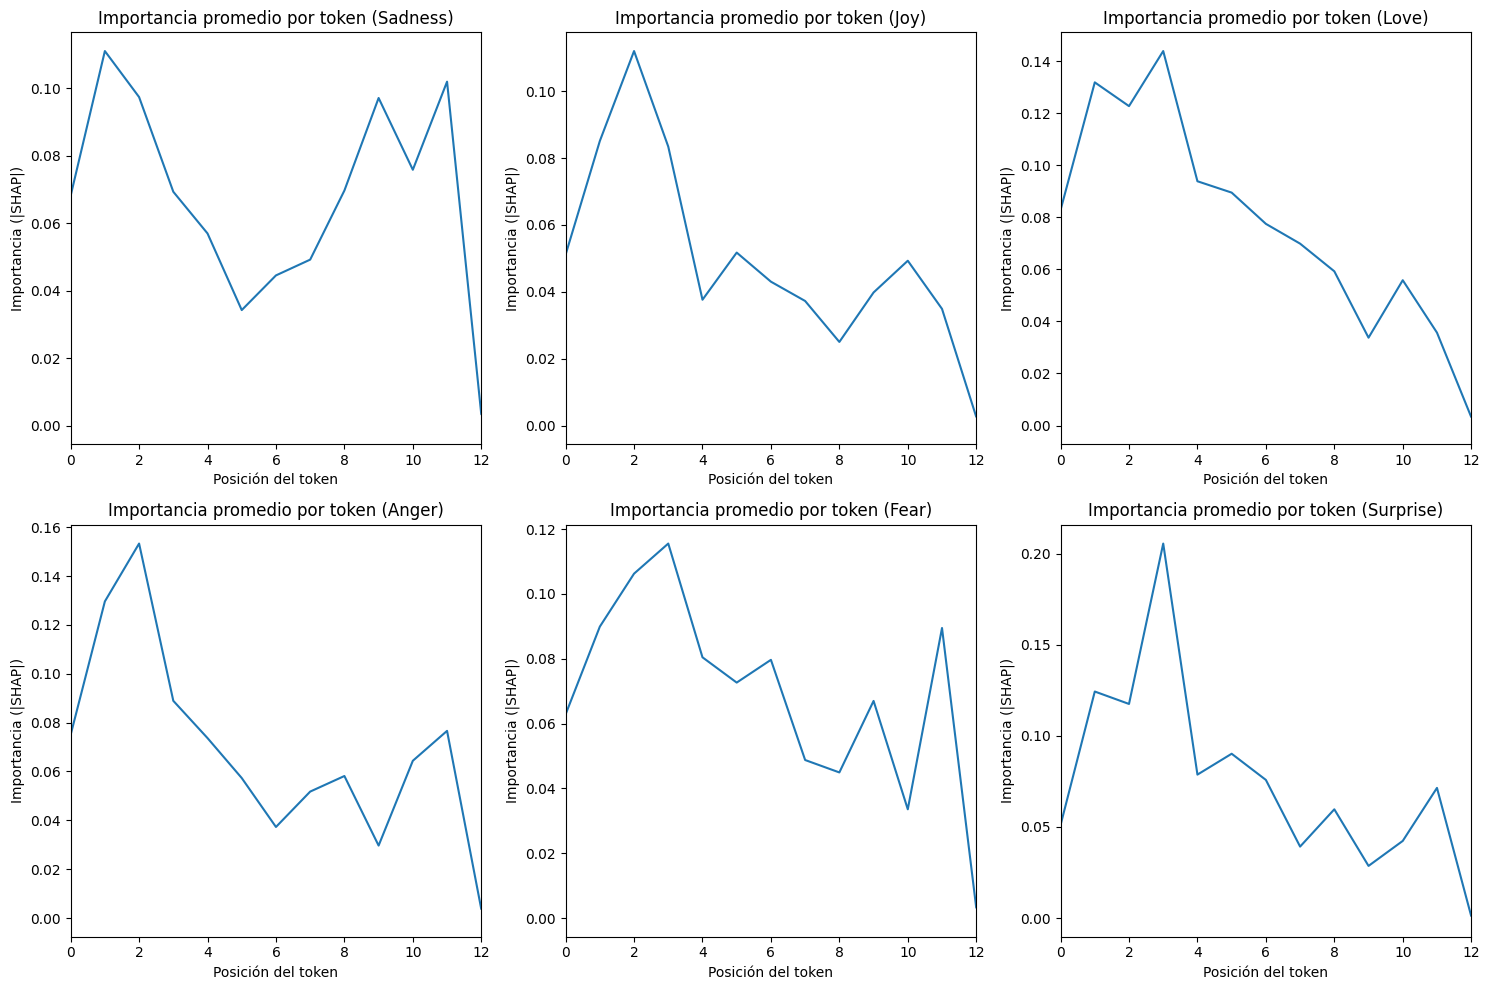

In [ ]:
# Configuramos los subgráficos
n_classes = 6
n_rows = 2
n_cols = 3

n_eti=['Sadness','Joy','Love','Anger', 'Fear','Surprise']

# Creamos la figura y los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Aplanamos el array de ejes para poder iterar fácilmente
axes = axes.flatten()

# Iteramos sobre las 6 clases para crear un gráfico para cada una
for clase in range(n_classes):
    # Creamos la máscara que considera:
    # 1. Las predicciones coinciden con las etiquetas reales
    # 2. La clase es igual a la clase que estamos analizando
    mask_class = (predicted_class_str == Y_seleccionado) & (predicted_class_str == str(clase))

    # Filtramos las importancias de los tokens solo para esas muestras
    token_importance_class = np.abs(shap_array[mask_class, :, clase])

    # Calculamos la importancia promedio por token para esa clase
    avg_token_importance_class = np.mean(token_importance_class, axis=0)

    # Dibujamos el gráfico para la clase actual
    axes[clase].plot(avg_token_importance_class)
    axes[clase].set_title(f"Importancia promedio por token ({n_eti[clase]})")
    axes[clase].set_xlabel("Posición del token")
    axes[clase].set_ylabel("Importancia (|SHAP|)")
    axes[clase].set_xlim(0,longitud)

# Ajustamos el espaciado entre los gráficos
plt.tight_layout()

plt.savefig("importancia_por_clase.png", dpi=300)

# Mostramos el gráfico
plt.show()

####Shap en muestras

appreciate beyond measure still carry guilt feeling pissed ed ness body able
Anger


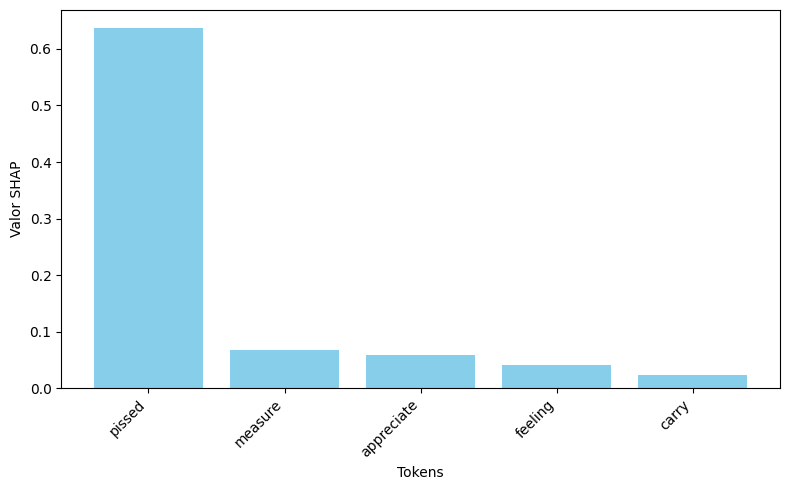

In [ ]:
muestra=nm_mu*0+15
clase=int(Y_seleccionado[muestra])

# 1. Obtener tokens reales de la muestra
input_tokens = vectorizer(X_seleccionado[muestra:muestra+1])
vocab = vectorizer.get_vocabulary()
token_words = [vocab[i] for i in input_tokens[0].numpy()]

# 2. Valores SHAP para esa clase
values_class = shap_values.values[muestra, :, clase]

# 3. Top 10 tokens más importantes
top10_idx = np.argsort(np.abs(values_class))[-5:][::-1]
top10_tokens = np.array(token_words)[top10_idx]
top10_values = values_class[top10_idx]

#Muestra
print(X_seleccionado[muestra])
print(n_eti[clase])

# 4. Plot
plt.figure(figsize=(8,5))
plt.bar(top10_tokens, top10_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
#plt.title(f"Top 10 características más importantes ({n_eti[clase-1]})")
plt.ylabel("Valor SHAP")
plt.xlabel("Tokens")
plt.tight_layout()
plt.savefig(f"shap_muestra_{n_eti[clase]}.png", dpi=300)
plt.show()



im feeling distressed friends behaviour especially regards past love holy promise psalms
Fear


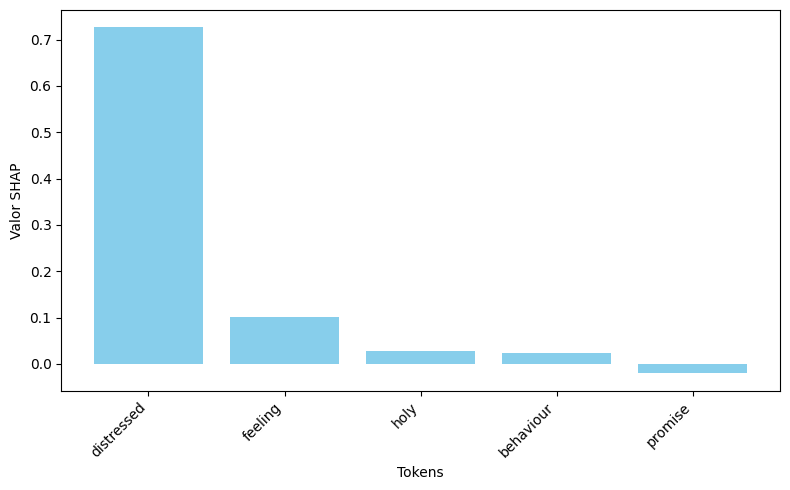

In [ ]:
muestra=nm_mu*1+5
clase = int(Y_seleccionado[muestra])

# 1. Obtener tokens reales de la muestra
input_tokens = vectorizer(X_seleccionado[muestra:muestra+1])
vocab = vectorizer.get_vocabulary()
token_words = [vocab[i] for i in input_tokens[0].numpy()]

# 2. Valores SHAP para esa clase
values_class = shap_values.values[muestra, :, clase]

# 3. Top 10 tokens más importantes
top10_idx = np.argsort(np.abs(values_class))[-5:][::-1]
top10_tokens = np.array(token_words)[top10_idx]
top10_values = values_class[top10_idx]

#Muestra
print(X_seleccionado[muestra])
print(n_eti[clase])

# 4. Plot
plt.figure(figsize=(8,5))
plt.bar(top10_tokens, top10_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
#plt.title(f"Top 10 características más importantes ({n_eti[clase-1]})")
plt.ylabel("Valor SHAP")
plt.xlabel("Tokens")
plt.tight_layout()
plt.savefig(f"shap_muestra_{n_eti[clase]}.png", dpi=300)
plt.show()



ive going school stuck tiny space facing table pilled books feeling isolated
Sadness


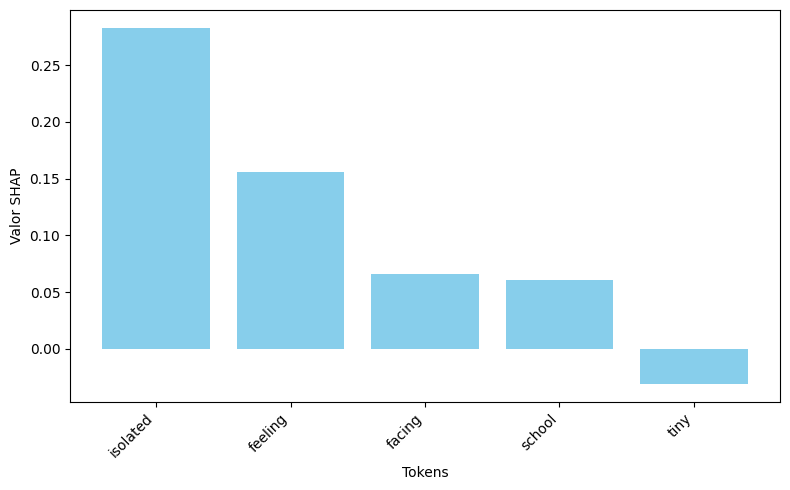

In [ ]:
muestra=nm_mu*2+4
clase = int(Y_seleccionado[muestra])

# 1. Obtener tokens reales de la muestra
input_tokens = vectorizer(X_seleccionado[muestra:muestra+1])
vocab = vectorizer.get_vocabulary()
token_words = [vocab[i] for i in input_tokens[0].numpy()]

# 2. Valores SHAP para esa clase
values_class = shap_values.values[muestra, :, clase]

# 3. Top 10 tokens más importantes
top10_idx = np.argsort(np.abs(values_class))[-5:][::-1]
top10_tokens = np.array(token_words)[top10_idx]
top10_values = values_class[top10_idx]

#Muestra
print(X_seleccionado[muestra])
print(n_eti[clase])

# 4. Plot
plt.figure(figsize=(8,5))
plt.bar(top10_tokens, top10_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
#plt.title(f"Top 10 características más importantes ({n_eti[clase-1]})")
plt.ylabel("Valor SHAP")
plt.xlabel("Tokens")
plt.tight_layout()
plt.savefig(f"shap_muestra_{n_eti[clase]}.png", dpi=300)
plt.show()



feel excited privileged observe things closely try portray fleeting moments blink eye
Joy


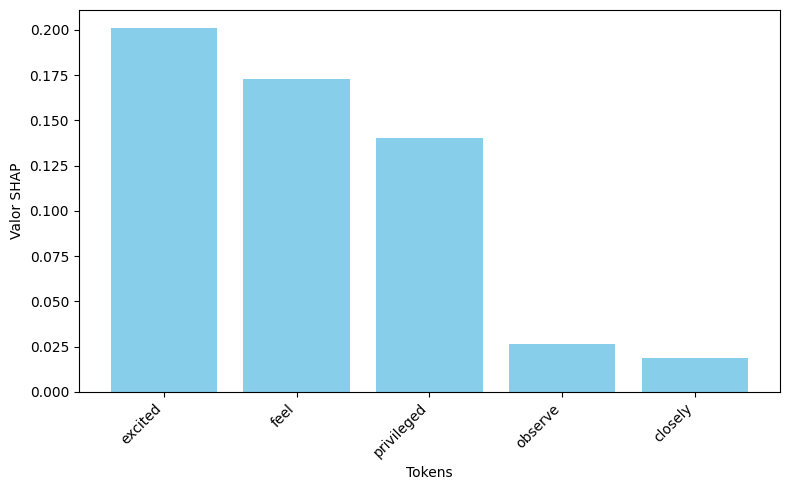

In [ ]:
muestra=nm_mu*3+1
clase = int(Y_seleccionado[muestra])


# 1. Obtener tokens reales de la muestra
input_tokens = vectorizer(X_seleccionado[muestra:muestra+1])
vocab = vectorizer.get_vocabulary()
token_words = [vocab[i] for i in input_tokens[0].numpy()]

# 2. Valores SHAP para esa clase
values_class = shap_values.values[muestra, :, clase]

# 3. Top 10 tokens más importantes
top10_idx = np.argsort(np.abs(values_class))[-5:][::-1]
top10_tokens = np.array(token_words)[top10_idx]
top10_values = values_class[top10_idx]

#Muestra
print(X_seleccionado[muestra])
print(n_eti[clase])

# 4. Plot
plt.figure(figsize=(8,5))
plt.bar(top10_tokens, top10_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
#plt.title(f"Top 10 características más importantes ({n_eti[clase-1]})")
plt.ylabel("Valor SHAP")
plt.xlabel("Tokens")
plt.tight_layout()
plt.savefig(f"shap_muestra_{n_eti[clase]}.png", dpi=300)
plt.show()




hear anything deeply engrossed sighting could sense feeling kissing cropping romantic head
Love


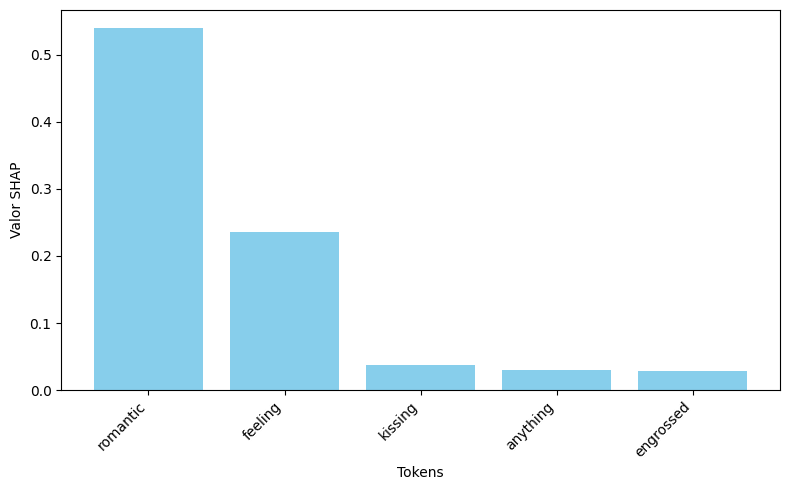

In [ ]:
muestra=nm_mu*4+8
clase = int(Y_seleccionado[muestra])

# 1. Obtener tokens reales de la muestra
input_tokens = vectorizer(X_seleccionado[muestra:muestra+1])
vocab = vectorizer.get_vocabulary()
token_words = [vocab[i] for i in input_tokens[0].numpy()]

# 2. Valores SHAP para esa clase
values_class = shap_values.values[muestra, :, clase]

# 3. Top 10 tokens más importantes
top10_idx = np.argsort(np.abs(values_class))[-5:][::-1]
top10_tokens = np.array(token_words)[top10_idx]
top10_values = values_class[top10_idx]

#Muestra
print(X_seleccionado[muestra])
print(n_eti[clase])

# 4. Plot
plt.figure(figsize=(8,5))
plt.bar(top10_tokens, top10_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
#plt.title(f"Top 10 características más importantes ({n_eti[clase-1]})")
plt.ylabel("Valor SHAP")
plt.xlabel("Tokens")
plt.tight_layout()
plt.savefig(f"shap_muestra_{n_eti[clase]}.png", dpi=300)
plt.show()



remember feeling really impressed living situation bit depressed since dorms kinda suck
Surprise


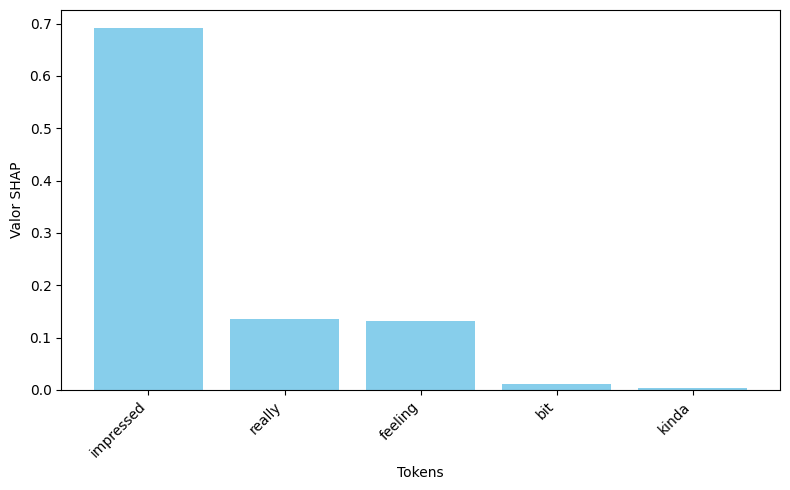

In [ ]:
muestra=nm_mu*5+11
clase = int(Y_seleccionado[muestra])


# 1. Obtener tokens reales de la muestra
input_tokens = vectorizer(X_seleccionado[muestra:muestra+1])
vocab = vectorizer.get_vocabulary()
token_words = [vocab[i] for i in input_tokens[0].numpy()]

# 2. Valores SHAP para esa clase
values_class = shap_values.values[muestra, :, clase]

# 3. Top 10 tokens más importantes
top10_idx = np.argsort(np.abs(values_class))[-5:][::-1]
top10_tokens = np.array(token_words)[top10_idx]
top10_values = values_class[top10_idx]

#Muestra
print(X_seleccionado[muestra])
print(n_eti[clase])

# 4. Plot
plt.figure(figsize=(8,5))
plt.bar(top10_tokens, top10_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
#plt.title(f"Top 10 características más importantes ({n_eti[clase-1]})")
plt.ylabel("Valor SHAP")
plt.xlabel("Tokens")
plt.tight_layout()
plt.savefig(f"shap_muestra_{n_eti[clase]}.png", dpi=300)
plt.show()


